# Assessment 1 – X 教育：PyCaret 分析
**日期**：2025-11-03  
用 **PyCaret** 完成：資料探索 → 建模 → 特徵重要性 → 混淆矩陣 → 準確率/FPR/FNR/AUC → 利潤（$11/$20）→ 新資料預測與商業比較。
將 `leads.csv`、`new_leads.csv` 與本檔放在同一資料夾後 **Run All**。

In [2]:
# 0) 套件與版本
import pandas as pd, numpy as np
from pycaret import __version__ as pc_version
from pycaret.classification import setup, compare_models, predict_model, plot_model, add_metric
print('pandas =', pd.__version__, ' | PyCaret =', pc_version)

pandas = 2.1.4  | PyCaret = 3.3.2


In [3]:
# 1) 載入資料 & 基本檢查
df = pd.read_csv('leads.csv')
print('Shape:', df.shape)
display(df.head())
df.info()
print('\nLead Origin value_counts:')
display(df['Lead Origin'].value_counts(dropna=False).to_frame('count'))
print('\nLead Source value_counts:')
display(df['Lead Source'].value_counts(dropna=False).to_frame('count'))
num_cols = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
stats = df[num_cols].describe().T
display(stats)
median_time = stats.loc['Total Time Spent on Website','50%']
iqr_time = stats.loc['Total Time Spent on Website','75%'] - stats.loc['Total Time Spent on Website','25%']
print(f"Median Time = {median_time:.0f} | IQR = {iqr_time:.0f}")

Shape: (8316, 35)


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Activity Index,Profile Index,Activity Score,Profile Score
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,No,No,Modified,02.Medium,02.Medium,15.0,15.0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,No,No,Email Opened,02.Medium,02.Medium,15.0,15.0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,No,Yes,Email Opened,02.Medium,01.High,14.0,20.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,No,No,Modified,02.Medium,01.High,13.0,17.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,No,No,Modified,02.Medium,01.High,15.0,18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8316 non-null   object 
 1   Lead Source                                    8284 non-null   object 
 2   Do Not Email                                   8316 non-null   object 
 3   Do Not Call                                    8316 non-null   object 
 4   Converted                                      8316 non-null   int64  
 5   TotalVisits                                    8192 non-null   float64
 6   Total Time Spent on Website                    8316 non-null   int64  
 7   Page Views Per Visit                           8192 non-null   float64
 8   Last Activity                                  8219 non-null   object 
 9   Country                                        6092 

,count
Lead Origin,
Landing Page Submission,4374
API,3246
Lead Add Form,650
Lead Import,45
Quick Add Form,1



Lead Source value_counts:


,count
Lead Source,
Google,2582
Direct Traffic,2284
Olark Chat,1583
Organic Search,1036
Reference,482
Welingak Website,130
Referral Sites,116
Facebook,45
NaN,32


,count,mean,std,min,25%,50%,75%,max
Total Time Spent on Website,8316.0,486.067100,547.428425,0.0,11.0,247.0,932.0,2272.0
Page Views Per Visit,8192.0,2.359569,2.169593,0.0,1.0,2.0,3.0,55.0
TotalVisits,8192.0,3.434814,4.980014,0.0,1.0,3.0,5.0,251.0


Median Time = 247 | IQR = 921


## 2) PyCaret 建模

In [4]:
s = setup(data=df, target='Converted', session_id=42, verbose=False, html=False)
best = compare_models()
best

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9354  0.9802  0.9089  0.9216   
gbc          Gradient Boosting Classifier    0.9345  0.9797  0.9049  0.9231   
rf               Random Forest Classifier    0.9325  0.9750  0.8941  0.9274   
et                 Extra Trees Classifier    0.9273  0.9722  0.8860  0.9214   
lr                    Logistic Regression    0.9251  0.9748  0.8914  0.9113   
ada                  Ada Boost Classifier    0.9234  0.9748  0.8852  0.9128   
ridge                    Ridge Classifier    0.9232  0.9737  0.8766  0.9195   
lda          Linear Discriminant Analysis    0.9229  0.9733  0.8780  0.9174   
dt               Decision Tree Classifier    0.9086  0.9059  0.8834  0.8789   
nb                            Naive Bayes    0.8258  0.9270  0.9134  0.7132   
knn                K Neighbors Classifier    0.8006  0.8501  0.7245  0.7471   
svm                   SVM - Linear Kernel    0.7298 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

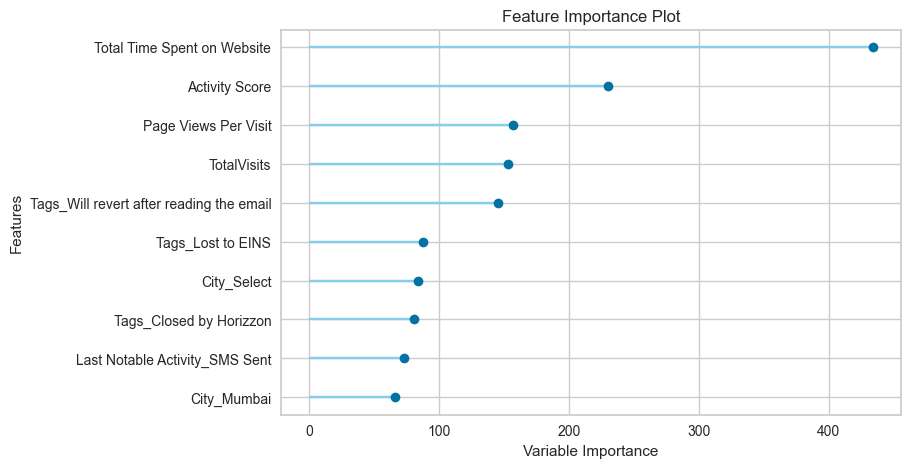

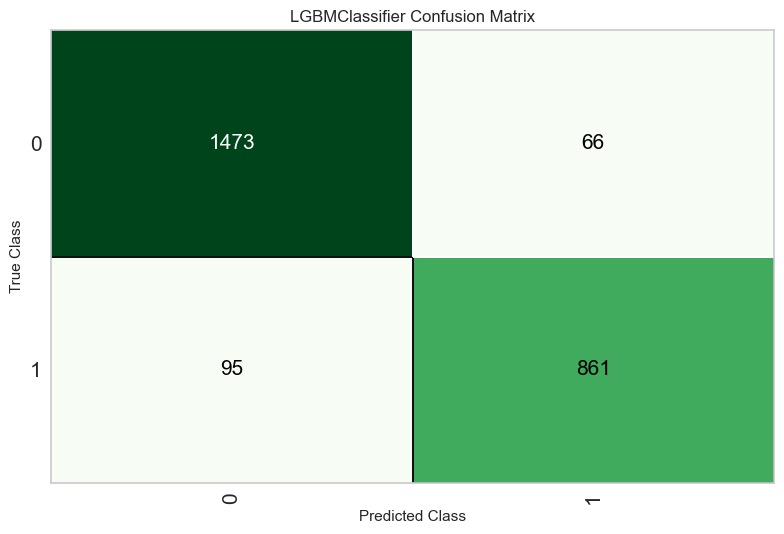

In [5]:
# 特徵重要性與混淆矩陣
try:
    plot_model(best, plot='feature')
    plot_model(best, plot='confusion_matrix')
except Exception as e:
    print('plot_model warning:', e)

## 3) 準確率 / FPR / FNR / AUC

In [6]:
from sklearn.metrics import confusion_matrix, roc_auc_score
preds = predict_model(best)
display(preds.head())
pred_col = 'prediction_label' if 'prediction_label' in preds.columns else ('Label' if 'Label' in preds.columns else None)
if pred_col is None:
    raise RuntimeError('找不到預測欄位，請檢查 PyCaret 版本輸出欄位。')
y_true = preds['Converted'].to_numpy().astype(int)
y_pred = preds[pred_col].to_numpy().astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
fpr = fp / (fp + tn) if (fp + tn) else 0.0
fnr = fn / (fn + tp) if (fn + tp) else 0.0
auc = roc_auc_score(y_true, preds['prediction_score']) if 'prediction_score' in preds.columns else None
print({'Accuracy': round(acc,4), 'FPR': round(fpr,4), 'FNR': round(fnr,4), 'AUC': (round(auc,4) if auc is not None else None)})

                             Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.9355  0.9786  0.9006  0.9288  0.9145   

    Kappa    MCC  
0  0.8627  0.863  


,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Activity Index,Profile Index,Activity Score,Profile Score,Converted,prediction_label,prediction_score
5941,Landing Page Submission,Direct Traffic,No,No,2.0,1294,2.0,Email Opened,India,Media and Advertising,...,No,Yes,Email Opened,NaN,NaN,NaN,NaN,0,0,0.9663
6500,API,Olark Chat,No,No,0.0,0,0.0,Olark Chat Conversation,NaN,Select,...,No,No,Modified,NaN,NaN,NaN,NaN,0,0,0.9980
5062,Landing Page Submission,Google,No,No,5.0,366,2.5,Email Opened,India,Media and Advertising,...,No,No,Email Opened,NaN,NaN,NaN,NaN,0,0,0.9919
1223,Lead Add Form,Welingak Website,No,No,0.0,0,0.0,Email Opened,NaN,Select,...,No,No,Email Opened,02.Medium,02.Medium,14.0,15.0,1,1,0.9884
6792,API,Olark Chat,No,No,0.0,0,0.0,SMS Sent,NaN,Select,...,No,No,SMS Sent,02.Medium,02.Medium,13.0,15.0,0,0,0.8024


{'Accuracy': 0.9355, 'FPR': 0.0429, 'FNR': 0.0994, 'AUC': 0.4582}


## 4) 利潤評估（$11 / $20）

In [7]:
import numpy as np
def calculate_profit(actual, predicted, sales_expense=11, revenue=120):
    actual = np.asarray(actual).astype(int)
    predicted = np.asarray(predicted).astype(int)
    tp = np.sum((predicted==1) & (actual==1))
    fp = np.sum((predicted==1) & (actual==0))
    return tp*(revenue - sales_expense) - fp*sales_expense
add_metric('profit11', 'Profit@11', lambda a,p: calculate_profit(a,p,11), greater_is_better=True)
profit11 = calculate_profit(y_true, y_pred, sales_expense=11)
profit20 = calculate_profit(y_true, y_pred, sales_expense=20)
print({'Profit@$11': int(profit11), 'Profit@$20': int(profit20)})

{'Profit@$11': 93123, 'Profit@$20': 84780}


## 5) 新資料預測與『全聯絡』比較

In [8]:
new_leads = pd.read_csv('new_leads.csv')
new_preds = predict_model(best, data=new_leads, raw_score=True)
display(new_preds.head())
yhat_new = new_preds[pred_col].astype(int).to_numpy()
contact_cost = 11
contacted = int((yhat_new==1).sum())
cost_model = contacted * contact_cost
print(f'Using model → 需聯絡：{contacted}/{len(yhat_new)}；成本：${cost_model}')
if 'Converted' in new_leads.columns:
    true_conv = int(new_leads['Converted'].sum())
    profit_all = true_conv*120 - len(new_leads)*contact_cost
    tp_new = int(((yhat_new==1) & (new_leads['Converted'].astype(int)==1)).sum())
    profit_model = tp_new*120 - cost_model
    print({'Contact-all Profit': profit_all, 'Model Profit': profit_model, 'Delta': profit_model-profit_all})
else:
    print('新資料缺少真值 Converted，僅回報使用模型的聯絡數與成本。')

                             Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.9318  0.9774  0.9149  0.9173  0.9161   

    Kappa     MCC  Profit@11  
0  0.8587  0.8587      37155  


,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,A free copy of Mastering The Interview,Last Notable Activity,Activity Index,Profile Index,Activity Score,Profile Score,Converted,prediction_label,prediction_score_0,prediction_score_1
0,Landing Page Submission,Google,No,No,4.0,168,4.0,Email Opened,India,IT Projects Management,...,No,Email Opened,02.Medium,02.Medium,14.0,14.0,0,0,0.9735,0.0265
1,Lead Add Form,Reference,No,No,0.0,0,0.0,Email Opened,NaN,Finance Management,...,No,Modified,02.Medium,01.High,15.0,20.0,1,1,0.0022,0.9978
2,API,Olark Chat,No,No,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,...,No,Modified,01.High,02.Medium,17.0,15.0,0,0,0.9989,0.0011
3,Landing Page Submission,Google,No,No,3.0,257,3.0,Email Opened,India,Finance Management,...,No,Email Opened,NaN,NaN,NaN,NaN,0,0,0.9283,0.0717
4,Landing Page Submission,Direct Traffic,No,No,3.0,1087,1.5,SMS Sent,India,Finance Management,...,Yes,SMS Sent,02.Medium,01.High,14.0,18.0,1,1,0.1081,0.8919


Using model → 需聯絡：375/924；成本：$4125
{'Contact-all Profit': 34956, 'Model Profit': 37155, 'Delta': 2199}


## 6) 報告摘要輸出

In [9]:
summary = {
    'median_time': float(median_time),
    'iqr_time': float(iqr_time),
    'accuracy': float(acc),
    'fpr': float(fpr),
    'fnr': float(fnr),
    'auc': (float(auc) if auc is not None else None),
    'profit_holdout_11': int(profit11),
    'profit_holdout_20': int(profit20),
}
summary

{'median_time': 247.0,
 'iqr_time': 921.0,
 'accuracy': 0.9354709418837676,
 'fpr': 0.042884990253411304,
 'fnr': 0.09937238493723849,
 'auc': 0.4581555974237469,
 'profit_holdout_11': 93123,
 'profit_holdout_20': 84780}